<a href="https://colab.research.google.com/github/adarshakumar395/2dArrayAsArgument/blob/main/Network_Intrusion_Detection_PAD_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Training and Testing Dataset into Panda Dataframe

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/PAD_Network_DataSet/UNSW_NB15_testing-set.csv", index_col='id')
test_data = pd.read_csv("/content/drive/MyDrive/PAD_Network_DataSet/UNSW_NB15_testing-set.csv", index_col='id')

In [ ]:
train_data.sample(5)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
id,,,,,,,,,,,,,,,,,,,,,
24801,1.094599,tcp,http,FIN,14,18,1684,10168,28.320873,31,...,1,1,0,0,1,5,1,0,Normal,0
84442,0.656001,tcp,-,FIN,10,6,1294,268,22.865820,254,...,1,4,0,0,0,1,4,0,Normal,0
87788,1.829665,tcp,-,FIN,30,112,1514,126838,77.063290,62,...,1,1,0,0,0,3,1,0,Exploits,1
1337,0.580022,tcp,-,FIN,78,80,4550,72810,270.679399,31,...,1,2,0,0,0,4,4,0,Normal,0
56551,0.000003,rsvp,-,INT,2,0,200,0,333333.321500,254,...,1,4,0,0,0,1,4,0,Exploits,1


## Checking for Sample data from Training and Testing Dataset

In [ ]:
test_data.sample(5)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
id,,,,,,,,,,,,,,,,,,,,,
119569,1.230415,tcp,-,FIN,10,8,756,354,13.816477,254,...,1,2,0,0,0,1,2,0,Fuzzers,1
160067,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,14,22,0,0,0,14,22,0,Generic,1
151097,0.000008,udp,dns,INT,2,0,114,0,125000.000300,254,...,17,19,0,0,0,17,19,0,Generic,1
130561,0.000005,udp,dns,INT,2,0,114,0,200000.005100,254,...,17,17,0,0,0,17,17,0,Generic,1
17791,0.000930,udp,dns,CON,2,2,146,178,3225.806520,31,...,1,3,0,0,0,6,5,0,Normal,0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175341 entries, 1 to 175341
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                175341 non-null  float64
 1   proto              175341 non-null  object 
 2   service            175341 non-null  object 
 3   state              175341 non-null  object 
 4   spkts              175341 non-null  int64  
 5   dpkts              175341 non-null  int64  
 6   sbytes             175341 non-null  int64  
 7   dbytes             175341 non-null  int64  
 8   rate               175341 non-null  float64
 9   sttl               175341 non-null  int64  
 10  dttl               175341 non-null  int64  
 11  sload              175341 non-null  float64
 12  dload              175341 non-null  float64
 13  sloss              175341 non-null  int64  
 14  dloss              175341 non-null  int64  
 15  sinpkt             175341 non-null  float64
 16  di

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175341 entries, 1 to 175341
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                175341 non-null  float64
 1   proto              175341 non-null  object 
 2   service            175341 non-null  object 
 3   state              175341 non-null  object 
 4   spkts              175341 non-null  int64  
 5   dpkts              175341 non-null  int64  
 6   sbytes             175341 non-null  int64  
 7   dbytes             175341 non-null  int64  
 8   rate               175341 non-null  float64
 9   sttl               175341 non-null  int64  
 10  dttl               175341 non-null  int64  
 11  sload              175341 non-null  float64
 12  dload              175341 non-null  float64
 13  sloss              175341 non-null  int64  
 14  dloss              175341 non-null  int64  
 15  sinpkt             175341 non-null  float64
 16  di

In [ ]:
print('Number of instances=%d'%(train_data.shape[0]))
print('Number of attributes=%d'%(train_data.shape[1]))
print('Number of instances=%d'%(test_data.shape[0]))
print('Number of attributes=%d'%(test_data.shape[1]))

Number of instances=175341
Number of attributes=44
Number of instances=175341
Number of attributes=44


In [ ]:
print('Number of missing values:')
[(x, y) for x, y in zip(train_data.isna().sum(), train_data.isna().sum().index) if x > 0]


Number of missing values:


[]

In [ ]:
print('Number of missing values:')
[(x, y) for x, y in zip(test_data.isna().sum(), test_data.isna().sum().index) if x > 0]

Number of missing values:


[]

In [ ]:
import numpy as np

In [ ]:
train_data=train_data.replace('-',np.nan)
for column in train_data.columns:
    print('\t%s: %d'%(column,train_data[column].isnull().sum()))

	dur: 0
	proto: 0
	service: 94168
	state: 0
	spkts: 0
	dpkts: 0
	sbytes: 0
	dbytes: 0
	rate: 0
	sttl: 0
	dttl: 0
	sload: 0
	dload: 0
	sloss: 0
	dloss: 0
	sinpkt: 0
	dinpkt: 0
	sjit: 0
	djit: 0
	swin: 0
	stcpb: 0
	dtcpb: 0
	dwin: 0
	tcprtt: 0
	synack: 0
	ackdat: 0
	smean: 0
	dmean: 0
	trans_depth: 0
	response_body_len: 0
	ct_srv_src: 0
	ct_state_ttl: 0
	ct_dst_ltm: 0
	ct_src_dport_ltm: 0
	ct_dst_sport_ltm: 0
	ct_dst_src_ltm: 0
	is_ftp_login: 0
	ct_ftp_cmd: 0
	ct_flw_http_mthd: 0
	ct_src_ltm: 0
	ct_srv_dst: 0
	is_sm_ips_ports: 0
	attack_cat: 0
	label: 0


## Replacing null values with nan
- ### Replacing the null values with NAN values as by doing analysis of training and testing dataset we found that services column contains major number of Null values which is not providing valuable information to the model.

In [ ]:
test_data=test_data.replace('-',np.nan)
for column in test_data.columns:
    print('\t%s: %d'%(column,test_data[column].isnull().sum()))

	dur: 0
	proto: 0
	service: 94168
	state: 0
	spkts: 0
	dpkts: 0
	sbytes: 0
	dbytes: 0
	rate: 0
	sttl: 0
	dttl: 0
	sload: 0
	dload: 0
	sloss: 0
	dloss: 0
	sinpkt: 0
	dinpkt: 0
	sjit: 0
	djit: 0
	swin: 0
	stcpb: 0
	dtcpb: 0
	dwin: 0
	tcprtt: 0
	synack: 0
	ackdat: 0
	smean: 0
	dmean: 0
	trans_depth: 0
	response_body_len: 0
	ct_srv_src: 0
	ct_state_ttl: 0
	ct_dst_ltm: 0
	ct_src_dport_ltm: 0
	ct_dst_sport_ltm: 0
	ct_dst_src_ltm: 0
	is_ftp_login: 0
	ct_ftp_cmd: 0
	ct_flw_http_mthd: 0
	ct_src_ltm: 0
	ct_srv_dst: 0
	is_sm_ips_ports: 0
	attack_cat: 0
	label: 0


In [ ]:
 #sort by dtype, we'll mostly treat the numerics the same though
discrete_vars=['dur','spkts','dpkts','sbytes','dbytes','rate','sttl','dttl','sload','dload','sloss'
              ,'dloss','sinpkt','dinpkt','sjit','djit','swin','stcpb','dtcpb','tcprtt',
               'synack','ackdat','smean','dmean','trans_depth','response_body_len','ct_srv_src','ct_state_ttl',
               'ct_dst_ltm','ct_dst_sport_ltm','ct_dst_src_ltm','is_ftp_login','ct_ftp_cmd',
               'ct_flw_http_mthd','ct_src_ltm','ct_srv_dst','is_sm_ips_ports']
categorical_vars=['proto','service','state','attack_cat']


In [ ]:
for i in categorical_vars:
    print(train_data[i].value_counts())
    print()

tcp       79946
udp       63283
unas      12084
arp        2859
ospf       2595
          ...  
rdp          98
netblt       98
igmp         18
icmp         15
rtp           1
Name: proto, Length: 133, dtype: int64

dns         47294
http        18724
smtp         5058
ftp-data     3995
ftp          3428
ssh          1302
pop3         1105
dhcp           94
snmp           80
ssl            56
irc            25
radius         12
Name: service, dtype: int64

INT    82275
FIN    77825
CON    13152
REQ     1991
RST       83
ECO       12
PAR        1
URN        1
no         1
Name: state, dtype: int64

Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: attack_cat, dtype: int64



- ### Finding out the frequency of occurence of Proto, Service, State and Attack_cat columns contains

In [ ]:
for i in categorical_vars:
    print(test_data[i].value_counts())
    print()

tcp       79946
udp       63283
unas      12084
arp        2859
ospf       2595
          ...  
rdp          98
netblt       98
igmp         18
icmp         15
rtp           1
Name: proto, Length: 133, dtype: int64

dns         47294
http        18724
smtp         5058
ftp-data     3995
ftp          3428
ssh          1302
pop3         1105
dhcp           94
snmp           80
ssl            56
irc            25
radius         12
Name: service, dtype: int64

INT    82275
FIN    77825
CON    13152
REQ     1991
RST       83
ECO       12
PAR        1
URN        1
no         1
Name: state, dtype: int64

Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: attack_cat, dtype: int64



In [ ]:
d = {'INT':'INT', 'FIN':'FIN', 'CON':'CON', 'ECO':'OTHER', 'REQ':'REQ', 'RST':'RST', 'PAR':'OTHER', 'URN':'OTHER', 'no':'OTHER', 'ACC':'OTHER', 'CLO':'OTHER'}
train_data['state'] = train_data['state'].map(lambda s: d[s])

## Detecting Outlier in the Proto column
- ### Outliers deviate the mean of the model prediction and make model worse. After Performing value_counts() method we found large number of data is ‘tcp’, ‘udp’, ‘unas’ and ‘arp’. So, grouping the others value into one set and ‘tcp’, ‘udp’, ‘unas’ and ‘arp’ as individual will help to drop the unwanted rows.

In [ ]:
repeated_occurances_proto=['tcp','udp','unas','arp']
def encoding_categoricals(column):
    if column in repeated_occurances_proto:
        return column
    else:
        return "other"

In [ ]:
train_data['proto'] = train_data['proto'].apply(encoding_categoricals)
test_data['proto'] = test_data['proto'].apply(encoding_categoricals)

train_data = train_data[train_data['proto'] != 'other']
test_data = test_data[test_data['proto'] != "other"]

## One-Hot Encoding to the categorical features
- ### Applied One-hot encoding to the ‘State’ and ‘Proto’ features to convert the category into integer and it becomes easy to normalize afterwards.

In [ ]:
one_hot = pd.get_dummies(train_data['state'])
train_data = train_data.drop('state', axis=1)
train_data = train_data.join(one_hot)

one_hot = pd.get_dummies(train_data['proto'])
train_data = train_data.drop('proto', axis=1)
train_data = train_data.join(one_hot)

In [ ]:
d = {'INT':'INT', 'FIN':'FIN', 'CON':'CON', 'REQ':'REQ', 'RST':'RST', 'ACC':'OTHER', 'CLO':'OTHER','PAR':'OTHER', 'URN':'OTHER', 'no':'OTHER'}
test_data['state'] = test_data['state'].map(lambda s: d[s])

In [ ]:
one_hot = pd.get_dummies(test_data['state'])
test_data = test_data.drop('state', axis=1)
test_data = test_data.join(one_hot)

one_hot = pd.get_dummies(test_data['proto'])
test_data = test_data.drop('proto', axis=1)
test_data = test_data.join(one_hot)

In [ ]:
test_data

,dur,service,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,label,CON,FIN,INT,REQ,RST,arp,tcp,udp,unas
id,,,,,,,,,,,,,,,,,,,,,
1,0.121478,NaN,6,4,258,172,74.087490,252,254,1.415894e+04,...,0,0,1,0,0,0,0,1,0,0
2,0.649902,NaN,14,38,734,42014,78.473372,62,252,8.395112e+03,...,0,0,1,0,0,0,0,1,0,0
3,1.623129,NaN,8,16,364,13186,14.170161,62,252,1.572272e+03,...,0,0,1,0,0,0,0,1,0,0
4,1.681642,ftp,12,12,628,770,13.677108,62,252,2.740179e+03,...,0,0,1,0,0,0,0,1,0,0
5,0.449454,NaN,10,6,534,268,33.373826,254,252,8.561499e+03,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175337,0.000009,dns,2,0,114,0,111111.107200,254,0,5.066666e+07,...,1,0,0,1,0,0,0,0,1,0
175338,0.505762,NaN,10,8,620,354,33.612649,254,252,8.826286e+03,...,1,0,1,0,0,0,0,1,0,0
175339,0.000009,dns,2,0,114,0,111111.107200,254,0,5.066666e+07,...,1,0,0,1,0,0,0,0,1,0


In [ ]:
train_data

,dur,service,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,label,CON,FIN,INT,REQ,RST,arp,tcp,udp,unas
id,,,,,,,,,,,,,,,,,,,,,
1,0.121478,NaN,6,4,258,172,74.087490,252,254,1.415894e+04,...,0,0,1,0,0,0,0,1,0,0
2,0.649902,NaN,14,38,734,42014,78.473372,62,252,8.395112e+03,...,0,0,1,0,0,0,0,1,0,0
3,1.623129,NaN,8,16,364,13186,14.170161,62,252,1.572272e+03,...,0,0,1,0,0,0,0,1,0,0
4,1.681642,ftp,12,12,628,770,13.677108,62,252,2.740179e+03,...,0,0,1,0,0,0,0,1,0,0
5,0.449454,NaN,10,6,534,268,33.373826,254,252,8.561499e+03,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175337,0.000009,dns,2,0,114,0,111111.107200,254,0,5.066666e+07,...,1,0,0,1,0,0,0,0,1,0
175338,0.505762,NaN,10,8,620,354,33.612649,254,252,8.826286e+03,...,1,0,1,0,0,0,0,1,0,0
175339,0.000009,dns,2,0,114,0,111111.107200,254,0,5.066666e+07,...,1,0,0,1,0,0,0,0,1,0


## Plot Correlation matrix using Heatmap
- #### Plotted Correlated heatmap helps to understand the correlation between the features.
- #### After multiple trial and error we found 0.9 limit for correlation matrix between feature provides the important features for training model.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-74-c12df8cd47a4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_data.corr(method='pearson') #  ‘pearson’, ‘kendall’, ‘spearman’


<Axes: >

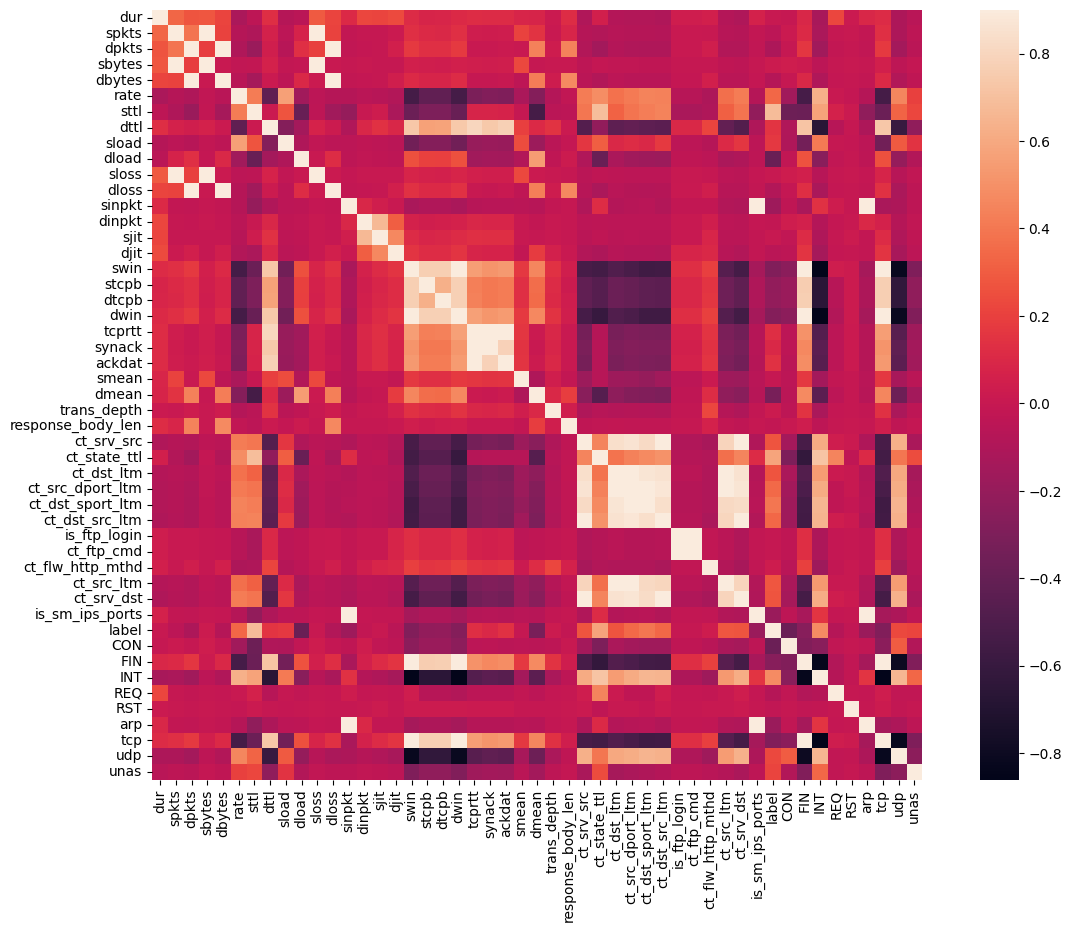

In [ ]:
corr_matrix = train_data.corr(method='pearson') #  ‘pearson’, ‘kendall’, ‘spearman’
fig = plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,vmax=0.9,square = True)

In [ ]:
train_data.head()

,dur,service,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,label,CON,FIN,INT,REQ,RST,arp,tcp,udp,unas
id,,,,,,,,,,,,,,,,,,,,,
1,0.121478,NaN,6,4,258,172,74.087490,252,254,14158.942380,...,0,0,1,0,0,0,0,1,0,0
2,0.649902,NaN,14,38,734,42014,78.473372,62,252,8395.112305,...,0,0,1,0,0,0,0,1,0,0
3,1.623129,NaN,8,16,364,13186,14.170161,62,252,1572.271851,...,0,0,1,0,0,0,0,1,0,0
4,1.681642,ftp,12,12,628,770,13.677108,62,252,2740.178955,...,0,0,1,0,0,0,0,1,0,0
5,0.449454,NaN,10,6,534,268,33.373826,254,252,8561.499023,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
columns = corr_matrix.columns
for i in range(corr_matrix.shape[0]):
    for j in range(i+1, corr_matrix.shape[0]):
         if corr_matrix.iloc[i,j] >= 0.9:
                print(f"{columns[i]} - {columns[j]} - {corr_matrix.iloc[i,j]}")

spkts - sbytes - 0.9645266219803947
spkts - sloss - 0.9730150202290939
dpkts - dbytes - 0.9720996368194565
dpkts - dloss - 0.978678011010083
sbytes - sloss - 0.9968700979937841
dbytes - dloss - 0.9965409206461359
sinpkt - is_sm_ips_ports - 0.9418877444531348
sinpkt - arp - 0.9402539899808889
swin - dwin - 0.9891691863568478
swin - FIN - 0.9736334505715558
swin - tcp - 0.9999463738095521
dwin - FIN - 0.9841791458727919
dwin - tcp - 0.9891763826556177
tcprtt - synack - 0.9481184388829876
tcprtt - ackdat - 0.940071707861846
ct_srv_src - ct_dst_src_ltm - 0.969186754380778
ct_srv_src - ct_srv_dst - 0.9797973923711704
ct_dst_ltm - ct_src_dport_ltm - 0.9628078543670269
ct_dst_ltm - ct_src_ltm - 0.9014258797848903
ct_src_dport_ltm - ct_dst_sport_ltm - 0.9052729256106571
ct_src_dport_ltm - ct_src_ltm - 0.9131553125866138
ct_dst_src_ltm - ct_srv_dst - 0.9743131492784967
is_ftp_login - ct_ftp_cmd - 1.0
is_sm_ips_ports - arp - 0.9818582603161613
FIN - tcp - 0.9735357943958368


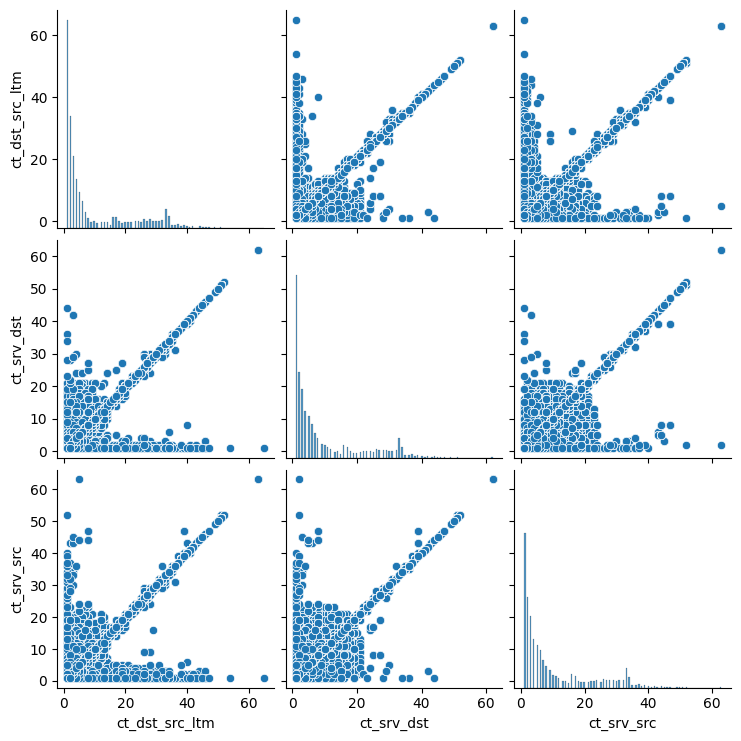

In [ ]:
sns.pairplot(train_data[['ct_dst_src_ltm', 'ct_srv_dst','ct_srv_src']])
plt.show()

## Dropping the column which is not highly correlated.

In [ ]:
train_data.drop(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'stcpb', 'dtcpb', 'dwin', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'is_sm_ips_ports', 'tcp', 'CON', 'FIN', 'REQ','service','attack_cat'],axis = 1, inplace = True)


In [ ]:
train_data.shape[1]

22

In [ ]:
print(test_data.columns)


Index(['dur', 'service', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit',
       'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat',
       'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label',
       'CON', 'FIN', 'INT', 'REQ', 'RST', 'arp', 'tcp', 'udp', 'unas'],
      dtype='object')


In [ ]:
print(test_data.head())  # Display the first few rows of the DataFrame


         dur service  spkts  dpkts  sbytes  dbytes       rate  sttl  dttl  \
id                                                                          
1   0.121478     NaN      6      4     258     172  74.087490   252   254   
2   0.649902     NaN     14     38     734   42014  78.473372    62   252   
3   1.623129     NaN      8     16     364   13186  14.170161    62   252   
4   1.681642     ftp     12     12     628     770  13.677108    62   252   
5   0.449454     NaN     10      6     534     268  33.373826   254   252   

           sload  ...  label  CON  FIN  INT  REQ  RST  arp  tcp  udp  unas  
id                ...                                                       
1   14158.942380  ...      0    0    1    0    0    0    0    1    0     0  
2    8395.112305  ...      0    0    1    0    0    0    0    1    0     0  
3    1572.271851  ...      0    0    1    0    0    0    0    1    0     0  
4    2740.178955  ...      0    0    1    0    0    0    0    1    0     0 

In [ ]:
#test_data.drop(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'stcpb', 'dtcpb', 'dwin', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'is_sm_ips_ports', 'tcp', 'CON', 'FIN', 'REQ','OTHER','service','attack_cat'],axis = 1, inplace = True)

In [ ]:
columns_to_drop = ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'stcpb', 'dtcpb', 'dwin', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'is_sm_ips_ports', 'tcp', 'CON', 'FIN', 'REQ', 'OTHER', 'service', 'attack_cat']

# Filter columns that exist in the DataFrame
columns_to_drop = [col for col in columns_to_drop if col in test_data.columns]

# Drop selected columns
test_data.drop(columns_to_drop, axis=1, inplace=True)


In [ ]:
test_data.shape[1]

22

#### Most correlated features are :

#### spkts, sbytes, sloss, dpkts, dbytes, dloss ,sinpkt, is_sm_ips_ports, swin, dwin, tcprtt, synack, ct_srv_src, ct_srv_dst, ct_dst_src_ltm, ct_src_dport_ltm, ct_dst_sport_ltm, is_ftp_login ct_ftp_cmd

In [ ]:
from collections.abc import Sequence
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os


# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)



# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd

In [ ]:
target = 'label'
features = list(train_data.columns)
features = [f for f in features if f!=target]

## Split the data into X and Y

In [ ]:
x_train=train_data[features]
y_train=train_data[[target]]


"""target = 'label'
features = list(train_data.columns)
features = [f for f in features if f!=target]"""


#x_test=test_data[features]
#y_test=test_data[[target]]

target = 'label'
features = list(train_data.columns)
features = [f for f in features if f != target and f != 'OTHER']  # Exclude 'OTHER' from features

x_test = test_data[features]
y_test = test_data[[target]]


In [ ]:
x_train.shape

(158172, 21)

In [ ]:
y_train.shape

(158172, 1)

In [ ]:
print(x_train.shape, y_train.shape)

(158172, 21) (158172, 1)


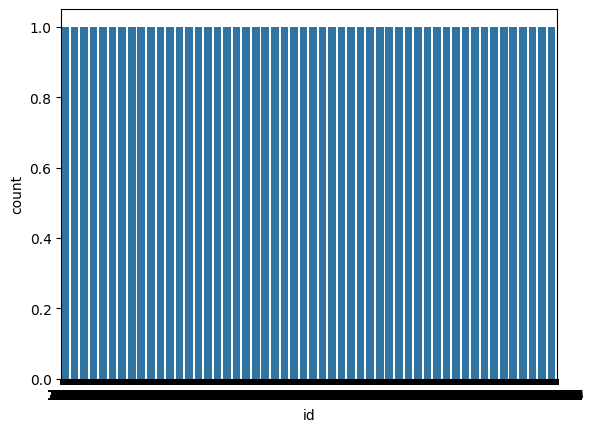

In [ ]:
#sns.set_theme(style="whitegrid")

sns.countplot(y_train[target])
plt.show()
#y_train[target].value_counts().plot(kind = 'bar')
#sns.boxplot(x="Class", y="V6", data=equal_sample,  ax=axes[1,3])

In [ ]:
print(x_test.shape,y_test.shape)

(158172, 21) (158172, 1)


In [ ]:
x_train = x_train.astype('float')
x_test = x_test.astype('float')

## Performed feature normalization using z-score

In [ ]:
for col in x_train.columns:
        encode_numeric_zscore(x_train,col)

for col in x_test.columns:
        encode_numeric_zscore(x_test,col)

In [ ]:
label0 = y_train[y_train['label'] == 0].index.values
label1 = y_train[y_train['label'] == 1].index.values

min_rows = min(y_train['label'].value_counts())

np.random.shuffle(label0)
np.random.shuffle(label1)

index_shuffled_label0  = list(label0)
index_shuffled_label1  = list(label1)

indices_ = index_shuffled_label0[:min_rows] + index_shuffled_label1[:min_rows]


In [ ]:
x_train.shape

(158172, 21)

In [ ]:
x_train = x_train.loc[indices_, :]
y_train= y_train.loc[indices_,:]

In [ ]:
print(x_train.shape, y_train.shape)

(111804, 21) (111804, 1)


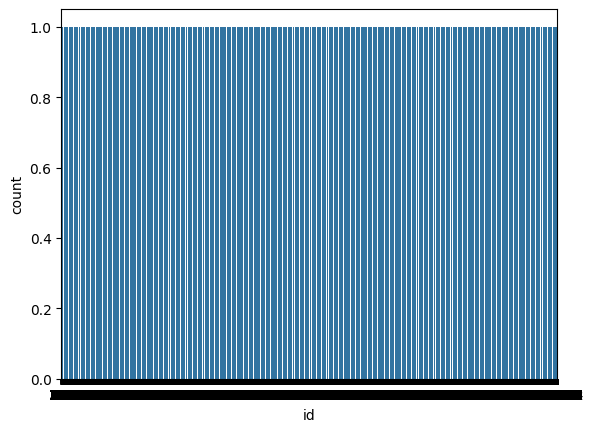

In [ ]:
sns.countplot(y_train[target])
plt.show()
#y_train['label'].value_counts().plot(kind = 'bar')

In [ ]:
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Logistic Regression

In [ ]:
target = 'label'
features = [f for f in train_data.columns if f != target and f != 'OTHER']

x_train = train_data[features]
y_train = train_data[[target]]

x_test = test_data[features]
y_test = test_data[[target]]


In [ ]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
log_clf = LogisticRegression()

# fit the model with data
log_clf.fit(x_train, y_train)

# predict the response for new observations
y_pred = log_clf.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[    70  55832]
 [   784 101486]]
Plotting confusion matrix


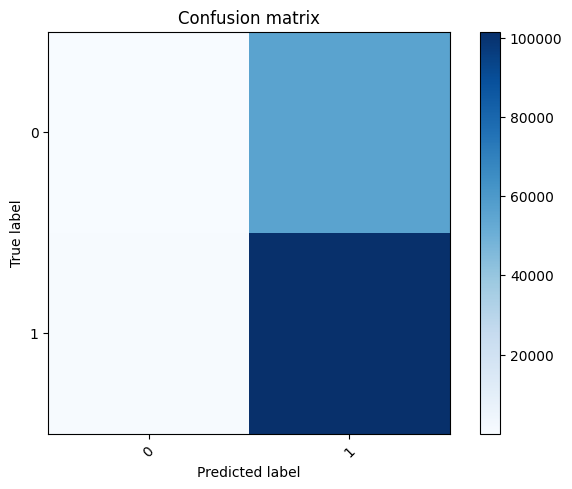

In [ ]:
 from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import roc_curve, auc

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)
classification = metrics.classification_report(y_test, y_pred)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(confusion_matrix, [0, 1])
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.08      0.00      0.00     55902
           1       0.65      0.99      0.78    102270

    accuracy                           0.64    158172
   macro avg       0.36      0.50      0.39    158172
weighted avg       0.45      0.64      0.51    158172



In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score
y_score=cross_val_predict(log_clf , x_train, y_train, cv=3)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("Precision : {}".format(precision_score(y_test, y_pred)))

Precision : 0.6451010056064787


In [ ]:
print("Recall : {}".format(recall_score(y_test, y_pred)))


Recall : 0.9923340177960301


In [ ]:
if y_score.ndim == 3:
    y_score = y_score[:, 1]

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_score)


In [ ]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])




def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)





In [ ]:
"""import matplotlib.pyplot as plt
plot_precision_vs_recall(precisions, recalls)
plt.save_fig("precision_vs_recall_plot")
plt.show()
plt.figure(figsize=(8, 6))"""

'import matplotlib.pyplot as plt\nplot_precision_vs_recall(precisions, recalls)\nplt.save_fig("precision_vs_recall_plot")\nplt.show()\nplt.figure(figsize=(8, 6))'

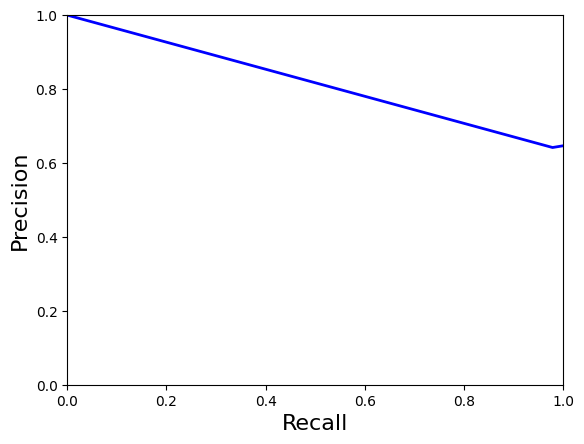

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [ ]:
# Plotting precision vs recall
plot_precision_vs_recall(precisions, recalls)
plt.savefig("precision_vs_recall_plot.png")
plt.show()
plt.figure(figsize=(8, 6))


In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_score)

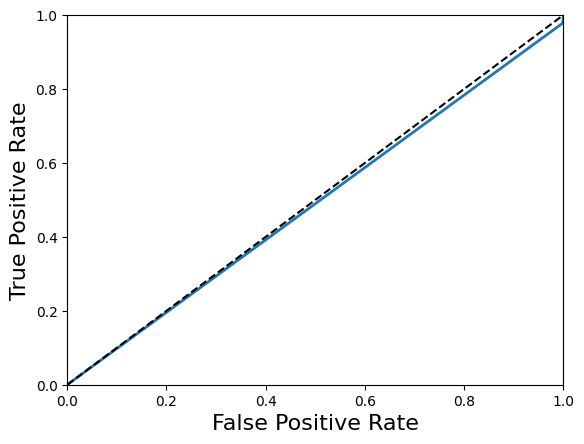

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [ ]:
plot_roc_curve(fpr, tpr)
#save_fig("roc_curve_plot")
plt.savefig("roc_curve_plot")
plt.show()
plt.figure(figsize=(8, 6))

In [ ]:
from sklearn.metrics import roc_auc_score

print("roc_score : {}".format(roc_auc_score(y_train, y_score)))

roc_score : 0.4897131985962233


In [ ]:
from sklearn import svm

#create svm classifier
svm_clf = svm.SVC(kernel = 'rbf', gamma = 5.0,random_state=13,max_iter=1000)
svm_clf.fit(x_train,y_train)




/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(gamma=5.0, max_iter=1000, random_state=13)

In [ ]:
y_pred=svm_clf.predict(x_test)

In [ ]:
score = metrics.accuracy_score(y_test, y_pred)

print("Accuracy score: {}".format(score))

Accuracy score: 0.6485724401284677


In [ ]:
precision_score = metrics.precision_score(y_test, y_pred, average= "weighted")
print("Precision score: {}".format(precision_score))
recall_score = metrics.recall_score(y_test, y_pred, average= "weighted")
print("Recall score: {}".format(recall_score))
f1_score = metrics.f1_score(y_test, y_pred, average= "weighted")
print("F1 score: {}".format(f1_score))

Precision score: 0.6077416052498812
Recall score: 0.6485724401284677
F1 score: 0.5639869820694677


In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.11      0.17     55902
           1       0.66      0.95      0.78    102270

    accuracy                           0.65    158172
   macro avg       0.59      0.53      0.48    158172
weighted avg       0.61      0.65      0.56    158172



[[ 5885 50017]
 [ 5569 96701]]
Plotting confusion matrix


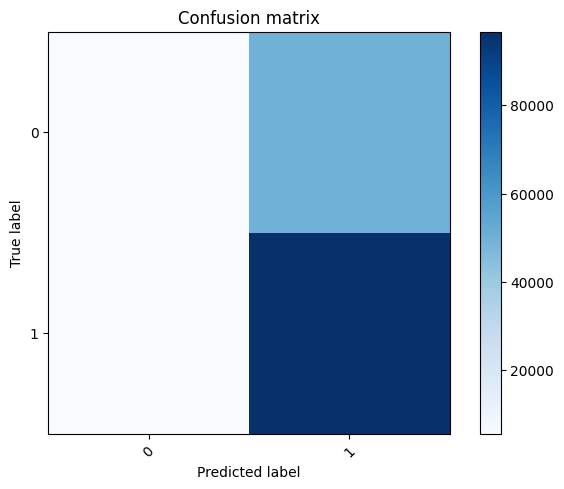

In [ ]:
# Compute confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)
classification = metrics.classification_report(y_test, y_pred)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(confusion_matrix, [0, 1])
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve

y_score=cross_val_predict(svm_clf , x_train, y_train, cv=3)
#precisions, recalls, thresholds = precision_recall_curve(y_train, score)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sk

In [ ]:
if y_score.ndim == 3:
    y_score = y_score[:, 1]

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_score)

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_score)

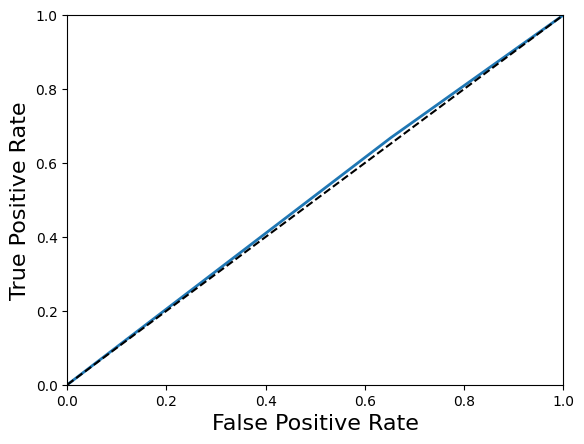

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [ ]:
plot_roc_curve(fpr, tpr)
plt.savefig("roc_curve_plot")
plt.show()
plt.figure(figsize=(8, 6))

In [ ]:
from sklearn.metrics import roc_auc_score

print("roc_score : {}".format(roc_auc_score(y_train, y_score)))

roc_score : 0.5079701776436719


In [ ]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

# instantiate the model (using the value K=10)
knn_clf = KNeighborsClassifier()

# fit the model with data
knn_clf.fit(x_train, y_train)

# predict the response for new observations
y_pred = knn_clf.predict(x_test)

print(y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[1 1 1 ... 1 1 1]


In [ ]:
precision_score = metrics.precision_score(y_test, y_pred, average= "weighted")
print("Precision score: {}".format(precision_score))
recall_score = metrics.recall_score(y_test, y_pred, average= "weighted")
print("Recall score: {}".format(recall_score))
f1_score = metrics.f1_score(y_test, y_pred, average= "weighted")
print("F1 score: {}".format(f1_score))

Precision score: 0.9354142449084111
Recall score: 0.9352287383354829
F1 score: 0.9346430187700635


In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90     55902
           1       0.93      0.97      0.95    102270

    accuracy                           0.94    158172
   macro avg       0.94      0.92      0.93    158172
weighted avg       0.94      0.94      0.93    158172



[[48763  7139]
 [ 3106 99164]]
Plotting confusion matrix


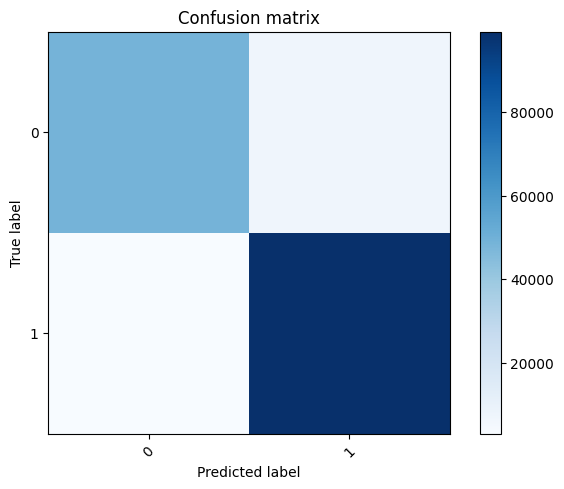

In [ ]:
# Compute confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)
classification = metrics.classification_report(y_test, y_pred)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(confusion_matrix, [0, 1])
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve

y_score=cross_val_predict(knn_clf , x_train, y_train, cv=3)
print(y_score)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[1 1 1 ... 1 1 1]


In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_score)

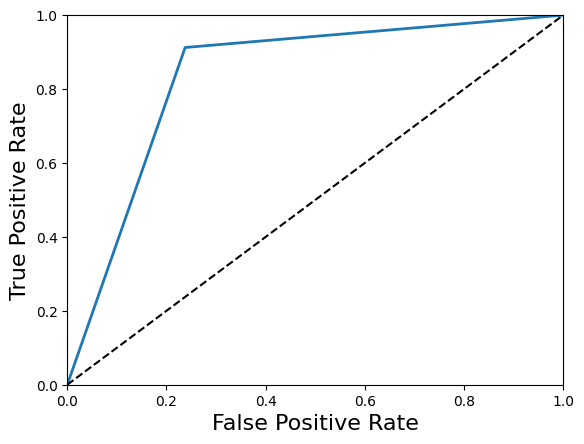

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_score)

plot_roc_curve(fpr, tpr)
plt.savefig("roc_curve_plot")
plt.show()
plt.figure(figsize=(8, 6))

In [ ]:
from sklearn.metrics import roc_auc_score

print("roc_score : {}".format(roc_auc_score(y_train, y_score)))

roc_score : 0.8373703739537737


In [ ]:
y_train_nn = pd.get_dummies(y_train['label'])
y_test = test_data.loc[:, ['label']]

In [ ]:
y_test_nn = pd.get_dummies(y_test['label'])

In [ ]:
print(x_train.shape, y_train_nn.shape)
print(x_test.shape,y_test_nn.shape)

(158172, 21) (158172, 2)
(158172, 21) (158172, 2)


## Fully-Connected Neural Network
### 1) Neural Network with Relu as Activation function and Adam as Optimizer

In [ ]:
#import io, requests, os, h5py, shutill
import io, requests, os, h5py, shutil

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_path = '/Users/moksh/CSUS/CSC215/Project_1/model_weight.hdf5'

model = Sequential()

#Tuning Hyperparameters to achieve best model and to improve performance
model.add(Dense(32, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(y_train_nn.shape[1],activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

monitor = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')

model_checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss',verbose=1,save_best_only=False,save_weights_only=False, mode='auto') # save best model

model.fit(x_train, y_train_nn, validation_data=(x_test,y_test_nn), callbacks=[monitor, model_checkpoint], verbose=2, epochs=50)

model.load_weights(checkpoint_path) # load weights from best model
model.save(checkpoint_path)

Epoch 1/50

Epoch 1: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight.hdf5
4943/4943 - 17s - loss: 59127.5625 - accuracy: 0.5905 - val_loss: 0.6448 - val_accuracy: 0.6360 - 17s/epoch - 3ms/step
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight.hdf5
4943/4943 - 20s - loss: 0.6205 - accuracy: 0.6660 - val_loss: 0.6136 - val_accuracy: 0.6694 - 20s/epoch - 4ms/step
Epoch 3/50

Epoch 3: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight.hdf5
4943/4943 - 19s - loss: 0.9090 - accuracy: 0.6686 - val_loss: 0.6243 - val_accuracy: 0.6698 - 19s/epoch - 4ms/step
Epoch 4/50

Epoch 4: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight.hdf5
4943/4943 - 16s - loss: 0.6222 - accuracy: 0.6718 - val_loss: 0.5923 - val_accuracy: 0.6993 - 16s/epoch - 3ms/step
Epoch 5/50

Epoch 5: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight.hdf5
4943/4943 - 20s - loss: 0.6218 - accuracy: 0.6721 - val_loss: 0.6255 - val_accuracy: 0.6684 - 20s/epoch - 4ms/step
Epoch 6/50

Epoch 6: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight.hdf5
4943/4943 - 18s - loss: 1.6191 - accuracy: 0.6687 - val_loss: 0.6251 - val_accuracy: 0.6690 - 18s/epo

In [ ]:
y_pred = model.predict(x_test)
print(y_pred)

4943/4943 [==============================] - 8s 2ms/step
[[0.26977324 0.7302267 ]
 [0.36872447 0.6312754 ]
 [0.06728776 0.9327122 ]
 ...
 [0.36872452 0.6312755 ]
 [0.36872452 0.6312755 ]
 [0.36872452 0.6312755 ]]


In [ ]:
y_pred = np.argmax(y_pred,axis=1) # raw probabilities to choose class (highest probability)
print(y_pred)


[1 1 1 ... 1 1 1]


In [ ]:
y_test_nn

,0,1
id,,
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
...,...,...
175337,0,1
175338,0,1
175339,0,1


In [ ]:
precision_score = metrics.precision_score(y_test, y_pred, average= "weighted")
print("Precision score: {}".format(precision_score))
recall_score = metrics.recall_score(y_test, y_pred, average= "weighted")
print("Recall score: {}".format(recall_score))
f1_score = metrics.f1_score(y_test, y_pred, average= "weighted")
print("F1 score: {}".format(f1_score))

Precision score: 0.7810464661090725
Recall score: 0.66893634777331
F1 score: 0.5568453095224339


In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.06      0.12     55902
           1       0.66      1.00      0.80    102270

    accuracy                           0.67    158172
   macro avg       0.83      0.53      0.46    158172
weighted avg       0.78      0.67      0.56    158172



[[  3537  52365]
 [     0 102270]]
Plotting confusion matrix


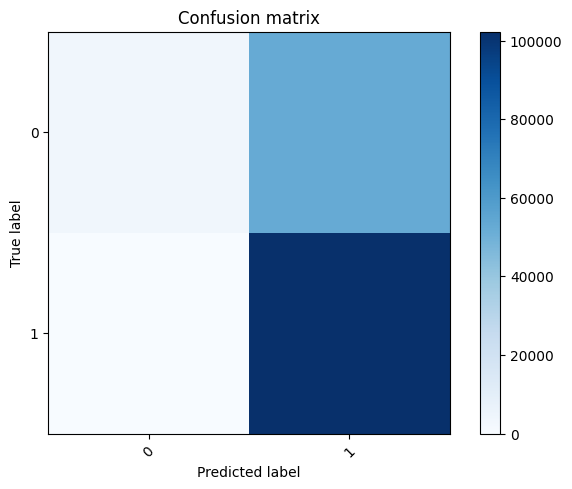

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)
classification = metrics.classification_report(y_test, y_pred)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(confusion_matrix, [0, 1])
plt.show()

In [ ]:
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

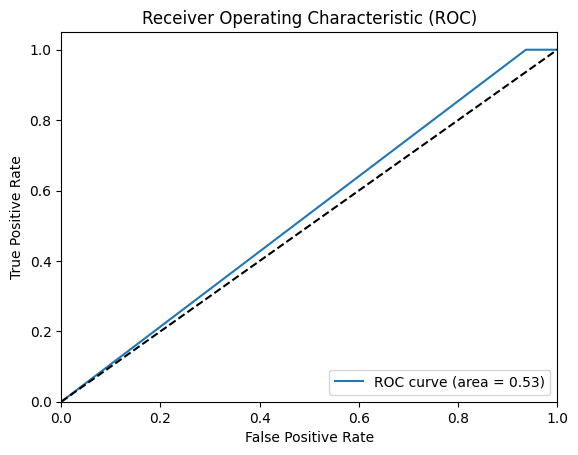

In [ ]:
plot_roc(y_pred, y_test)

### 2) Neural Network with Sigmoid as Activation function and sgd as Optimizer

In [ ]:
import io
import requests
import os
import h5py
import shutil
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_path = '/Users/moksh/CSUS/CSC215/Project_1/model_weight2.hdf5'

model = Sequential()

#Tuning Hyperparameters to achieve best model and to improve performance
model.add(Dense(32, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(16,activation='sigmoid'))
model.add(Dense(8,activation='sigmoid'))
model.add(Dense(y_train_nn.shape[1],activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

monitor = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')

model_checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss',verbose=1,save_best_only=False,save_weights_only=False, mode='auto') # save best model

model.fit(x_train, y_train_nn, validation_data=(x_test,y_test_nn), callbacks=[monitor, model_checkpoint], verbose=2, epochs=50)

model.load_weights(checkpoint_path) # load weights from best model
model.save(checkpoint_path)

Epoch 1/50

Epoch 1: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight2.hdf5
4943/4943 - 16s - loss: 0.6467 - accuracy: 0.6466 - val_loss: 0.6432 - val_accuracy: 0.6468 - 16s/epoch - 3ms/step
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight2.hdf5
4943/4943 - 17s - loss: 0.6420 - accuracy: 0.6572 - val_loss: 0.6385 - val_accuracy: 0.6673 - 17s/epoch - 4ms/step
Epoch 3/50

Epoch 3: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight2.hdf5
4943/4943 - 16s - loss: 0.6361 - accuracy: 0.6674 - val_loss: 0.6344 - val_accuracy: 0.6673 - 16s/epoch - 3ms/step
Epoch 4/50

Epoch 4: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight2.hdf5
4943/4943 - 19s - loss: 0.6329 - accuracy: 0.6675 - val_loss: 0.6313 - val_accuracy: 0.6677 - 19s/epoch - 4ms/step
Epoch 5/50

Epoch 5: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight2.hdf5
4943/4943 - 18s - loss: 0.6335 - accuracy: 0.6671 - val_loss: 0.6369 - val_accuracy: 0.6673 - 18s/epoch - 4ms/step
Epoch 6/50

Epoch 6: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight2.hdf5
4943/4943 - 18s - loss: 0.6360 - accuracy: 0.6658 - val_loss: 0.6353 - val_accuracy: 0.6659 - 18

In [ ]:
y_pred = model.predict(x_test)
print(y_pred)

4943/4943 [==============================] - 9s 2ms/step
[[0.36319295 0.6368071 ]
 [0.36319295 0.6368071 ]
 [0.36319295 0.6368071 ]
 ...
 [0.36319295 0.6368071 ]
 [0.36319295 0.6368071 ]
 [0.36319295 0.6368071 ]]


In [ ]:
y_pred = np.argmax(y_pred,axis=1) # raw probabilities to choose class (highest probability)
print(y_pred)

[1 1 1 ... 1 1 1]


In [ ]:
y_test_nn

,0,1
id,,
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
...,...,...
175337,0,1
175338,0,1
175339,0,1


In [ ]:
precision_score = metrics.precision_score(y_test, y_pred, average= "weighted")
print("Precision score: {}".format(precision_score))
recall_score = metrics.recall_score(y_test, y_pred, average= "weighted")
print("Recall score: {}".format(recall_score))
f1_score = metrics.f1_score(y_test, y_pred, average= "weighted")
print("F1 score: {}".format(f1_score))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision score: 0.4180587327314944
Recall score: 0.6465746149761019
F1 score: 0.5077920295006639


In [ ]:
print(metrics.classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     55902
           1       0.65      1.00      0.79    102270

    accuracy                           0.65    158172
   macro avg       0.32      0.50      0.39    158172
weighted avg       0.42      0.65      0.51    158172



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[     0  55902]
 [     0 102270]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Plotting confusion matrix


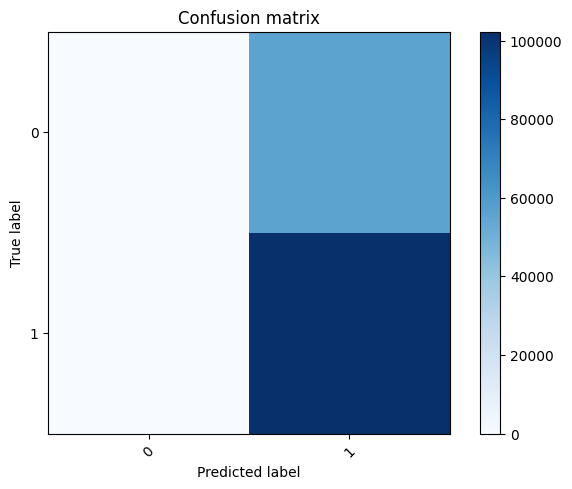

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)
classification = metrics.classification_report(y_test, y_pred)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(confusion_matrix, [0, 1])
plt.show()

In [ ]:
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

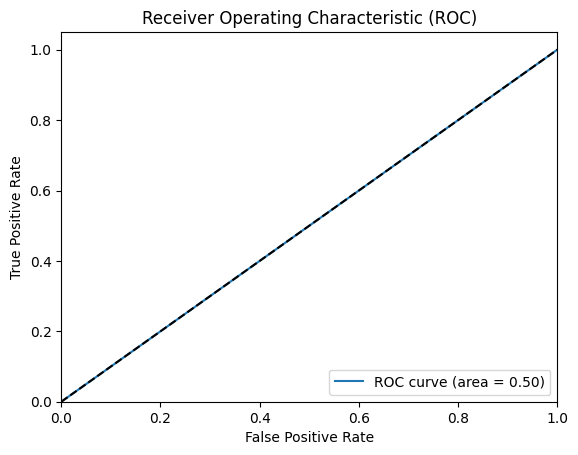

In [ ]:
plot_roc(y_pred, y_test)

### 3) Neural Network with tanh as Activation function and sgd as Optimizer

In [ ]:
import io
import requests
import os
import h5py
import shutil
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_path = '/Users/moksh/CSUS/CSC215/Project_1/model_weight3.hdf5'

model = Sequential()

#Tuning Hyperparameters to achieve best model and to improve performance
model.add(Dense(32, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(16,activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(y_train_nn.shape[1],activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

monitor = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')

model_checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss',verbose=1,save_best_only=False,save_weights_only=False, mode='auto') # save best model

model.fit(x_train, y_train_nn, validation_data=(x_test,y_test_nn), callbacks=[monitor, model_checkpoint], verbose=2, epochs=10)

model.load_weights(checkpoint_path) # load weights from best model
model.save(checkpoint_path)


Epoch 1/10

Epoch 1: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight3.hdf5
4943/4943 - 18s - loss: 0.6358 - accuracy: 0.6616 - val_loss: 0.6324 - val_accuracy: 0.6633 - 18s/epoch - 4ms/step
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight3.hdf5
4943/4943 - 18s - loss: 0.6320 - accuracy: 0.6650 - val_loss: 0.6325 - val_accuracy: 0.6654 - 18s/epoch - 4ms/step
Epoch 3/10

Epoch 3: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight3.hdf5
4943/4943 - 15s - loss: 0.6322 - accuracy: 0.6643 - val_loss: 0.6315 - val_accuracy: 0.6643 - 15s/epoch - 3ms/step
Epoch 4/10

Epoch 4: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight3.hdf5
4943/4943 - 15s - loss: 0.6335 - accuracy: 0.6631 - val_loss: 0.6328 - val_accuracy: 0.6632 - 15s/epoch - 3ms/step
Epoch 5/10

Epoch 5: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight3.hdf5
4943/4943 - 19s - loss: 0.6330 - accuracy: 0.6632 - val_loss: 0.6329 - val_accuracy: 0.6632 - 19s/epoch - 4ms/step
Epoch 6/10

Epoch 6: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight3.hdf5
4943/4943 - 17s - loss: 0.6328 - accuracy: 0.6632 - val_loss: 0.6322 - val_accuracy: 0.6632 - 17

In [ ]:
y_pred = model.predict(x_test)
print(y_pred)

4943/4943 [==============================] - 8s 2ms/step
[[0.35902885 0.64097106]
 [0.35902885 0.64097106]
 [0.35902885 0.64097106]
 ...
 [0.35902888 0.6409711 ]
 [0.35902888 0.6409711 ]
 [0.35902888 0.6409711 ]]


In [ ]:
y_pred = np.argmax(y_pred,axis=1) # raw probabilities to choose class (highest probability)
print(y_pred)

[1 1 1 ... 1 1 1]


In [ ]:
precision_score = metrics.precision_score(y_test, y_pred, average= "weighted")
print("Precision score: {}".format(precision_score))
recall_score = metrics.recall_score(y_test, y_pred, average= "weighted")
print("Recall score: {}".format(recall_score))
f1_score = metrics.f1_score(y_test, y_pred, average= "weighted")
print("F1 score: {}".format(f1_score))


Precision score: 0.7785447130229076
Recall score: 0.6631831171130163
F1 score: 0.5446922658088339


In [ ]:
print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.05      0.09     55902
           1       0.66      1.00      0.79    102270

    accuracy                           0.66    158172
   macro avg       0.83      0.52      0.44    158172
weighted avg       0.78      0.66      0.54    158172



In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)
classification = metrics.classification_report(y_test, y_pred)
print('Plotting confusion matrix')

[[  2627  53275]
 [     0 102270]]
Plotting confusion matrix


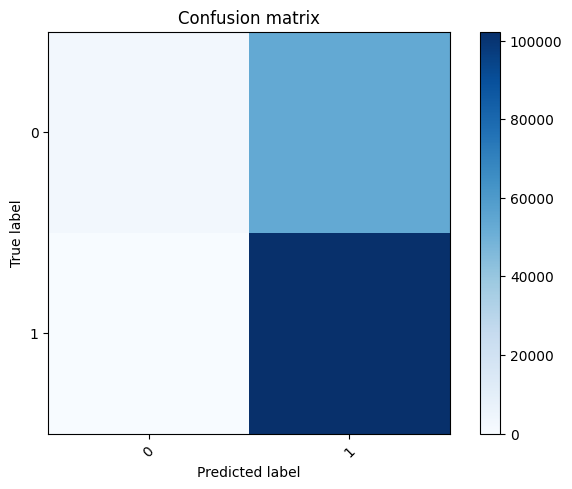

In [ ]:
plt.figure()
plot_confusion_matrix(confusion_matrix, [0, 1])
plt.show()

In [ ]:
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

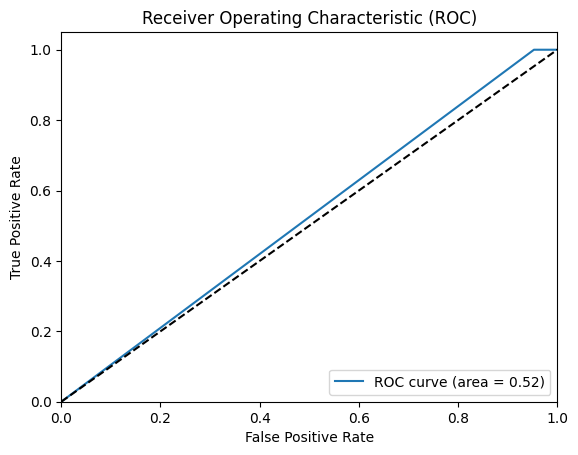

In [ ]:
plot_roc(y_pred, y_test)

### 4) Neural Network with tanh as Activation function and Adam as Optimizer

In [ ]:
import io
import requests
import os
import h5py
import shutil
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_path = '/Users/moksh/CSUS/CSC215/Project_1/model_weight4.hdf5'

model = Sequential()

#Tuning Hyperparameters to achieve best model and to improve performance
model.add(Dense(32, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(16,activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(y_train_nn.shape[1],activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

monitor = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')

model_checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss',verbose=1,save_best_only=False,save_weights_only=False, mode='auto') # save best model

model.fit(x_train, y_train_nn, validation_data=(x_test,y_test_nn), callbacks=[monitor, model_checkpoint], verbose=2, epochs=10)

model.load_weights(checkpoint_path) # load weights from best model
model.save(checkpoint_path)


Epoch 1/10

Epoch 1: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight4.hdf5
4943/4943 - 21s - loss: 0.6338 - accuracy: 0.6627 - val_loss: 0.6297 - val_accuracy: 0.6673 - 21s/epoch - 4ms/step
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight4.hdf5
4943/4943 - 19s - loss: 0.6303 - accuracy: 0.6668 - val_loss: 0.6277 - val_accuracy: 0.6684 - 19s/epoch - 4ms/step
Epoch 3/10

Epoch 3: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight4.hdf5
4943/4943 - 17s - loss: 0.6283 - accuracy: 0.6675 - val_loss: 0.6285 - val_accuracy: 0.6684 - 17s/epoch - 3ms/step
Epoch 4/10

Epoch 4: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight4.hdf5
4943/4943 - 16s - loss: 0.6273 - accuracy: 0.6674 - val_loss: 0.6234 - val_accuracy: 0.6689 - 16s/epoch - 3ms/step
Epoch 5/10

Epoch 5: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight4.hdf5
4943/4943 - 18s - loss: 0.6243 - accuracy: 0.6686 - val_loss: 0.6214 - val_accuracy: 0.6684 - 18s/epoch - 4ms/step
Epoch 6/10

Epoch 6: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight4.hdf5
4943/4943 - 19s - loss: 0.6257 - accuracy: 0.6685 - val_loss: 0.6286 - val_accuracy: 0.6689 - 19

In [ ]:
y_pred = model.predict(x_test)
print(y_pred)

4943/4943 [==============================] - 9s 2ms/step
[[0.35934302 0.640657  ]
 [0.35934302 0.640657  ]
 [0.35934302 0.640657  ]
 ...
 [0.35934302 0.640657  ]
 [0.35934302 0.640657  ]
 [0.35934302 0.640657  ]]


In [ ]:
y_pred = np.argmax(y_pred,axis=1) # raw probabilities to choose class (highest probability)
print(y_pred)


[1 1 1 ... 1 1 1]


In [ ]:
precision_score = metrics.precision_score(y_test, y_pred, average= "weighted")
print("Precision score: {}".format(precision_score))
recall_score = metrics.recall_score(y_test, y_pred, average= "weighted")
print("Recall score: {}".format(recall_score))
f1_score = metrics.f1_score(y_test, y_pred, average= "weighted")
print("F1 score: {}".format(f1_score))


Precision score: 0.7816798839683011
Recall score: 0.6717687074829932
F1 score: 0.5627821593314509


In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.07      0.13     55902
           1       0.66      1.00      0.80    102270

    accuracy                           0.67    158172
   macro avg       0.83      0.54      0.47    158172
weighted avg       0.78      0.67      0.56    158172



In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)
classification = metrics.classification_report(y_test, y_pred)
print('Plotting confusion matrix')

[[  3992  51910]
 [     7 102263]]
Plotting confusion matrix


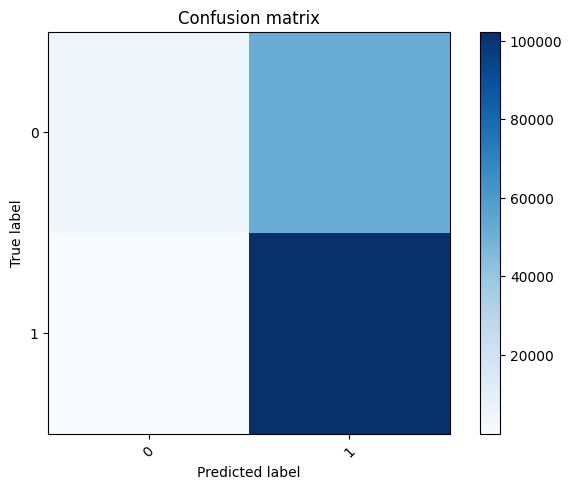

In [ ]:
plt.figure()
plot_confusion_matrix(confusion_matrix, [0, 1])
plt.show()

In [ ]:
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()


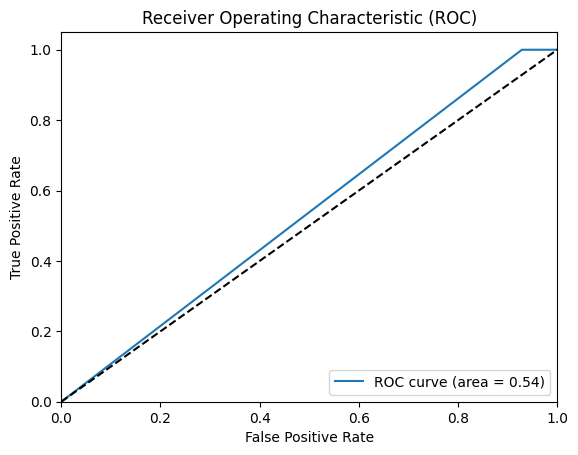

In [ ]:
plot_roc(y_pred, y_test)

## Additional Features

In [ ]:
import pandas as pd
train_data = pd.read_csv("/content/drive/MyDrive/PAD_Network_DataSet/UNSW_NB15_training-set.csv", index_col='id')
test_data = pd.read_csv("/content/drive/MyDrive/PAD_Network_DataSet/UNSW_NB15_testing-set.csv", index_col='id')

In [ ]:
#sort by dtype, we'll mostly treat the numerics the same though

discrete_vars=['dur','spkts','dpkts','sbytes','dbytes','sttl','dttl','sloss','dloss','swin',
               'smean','dmean','trans_depth','response_body_len','ct_srv_src','ct_state_ttl',
               'ct_dst_ltm','ct_dst_sport_ltm','ct_dst_src_ltm','is_ftp_login','ct_ftp_cmd',
               'ct_flw_http_mthd','ct_src_ltm','ct_srv_dst','is_sm_ips_ports']
continuous_vars=['rate','sload','dload','sinpkt','dinpkt', 'sjit','djit','synack','ackdat']
categorical_vars=['proto','state','attack_cat''stcpb','dtcpb', 'tcprtt']
dep_var=['label']


In [ ]:
train_data.loc[:, dep_var + discrete_vars + continuous_vars].describe()

,label,dur,spkts,dpkts,sbytes,dbytes,sttl,dttl,sloss,dloss,...,is_sm_ips_ports,rate,sload,dload,sinpkt,dinpkt,sjit,djit,synack,ackdat
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,...,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,82332.000000,82332.000000,82332.000000
mean,0.550600,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,180.967667,95.713003,4.753692,6.308556,...,0.011126,8.241089e+04,6.454902e+07,6.305470e+05,755.394301,121.701284,6.363075e+03,535.180430,0.029256,0.026669
std,0.497436,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,101.513358,116.667722,64.649620,55.708021,...,0.104891,1.486204e+05,1.798618e+08,2.393001e+06,6182.615732,1292.378499,5.672402e+04,3635.305383,0.070854,0.055094
min,0.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,62.000000,0.000000,0.000000,0.000000,...,0.000000,2.860611e+01,1.120247e+04,0.000000e+00,0.008000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
50%,1.000000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,254.000000,29.000000,1.000000,0.000000,...,0.000000,2.650177e+03,5.770032e+05,2.112951e+03,0.557929,0.010000,1.762392e+01,0.000000,0.000441,0.000080
75%,1.000000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,254.000000,252.000000,3.000000,2.000000,...,0.000000,1.111111e+05,6.514286e+07,1.585808e+04,63.409444,63.136369,3.219332e+03,128.459914,0.052596,0.048816
max,1.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,255.000000,253.000000,5319.000000,5507.000000,...,1.000000,1.000000e+06,5.268000e+09,2.082111e+07,60009.992000,57739.240000,1.483831e+06,463199.240100,3.226788,2.928778


<ipython-input-184-687be45568a2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['label'])


<Axes: xlabel='label', ylabel='Density'>

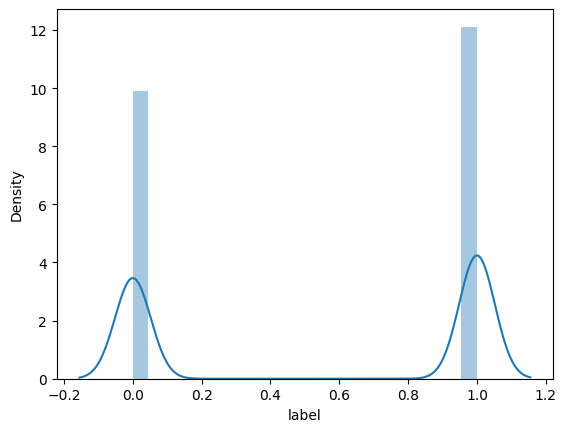

In [ ]:
sns.distplot(train_data['label'])

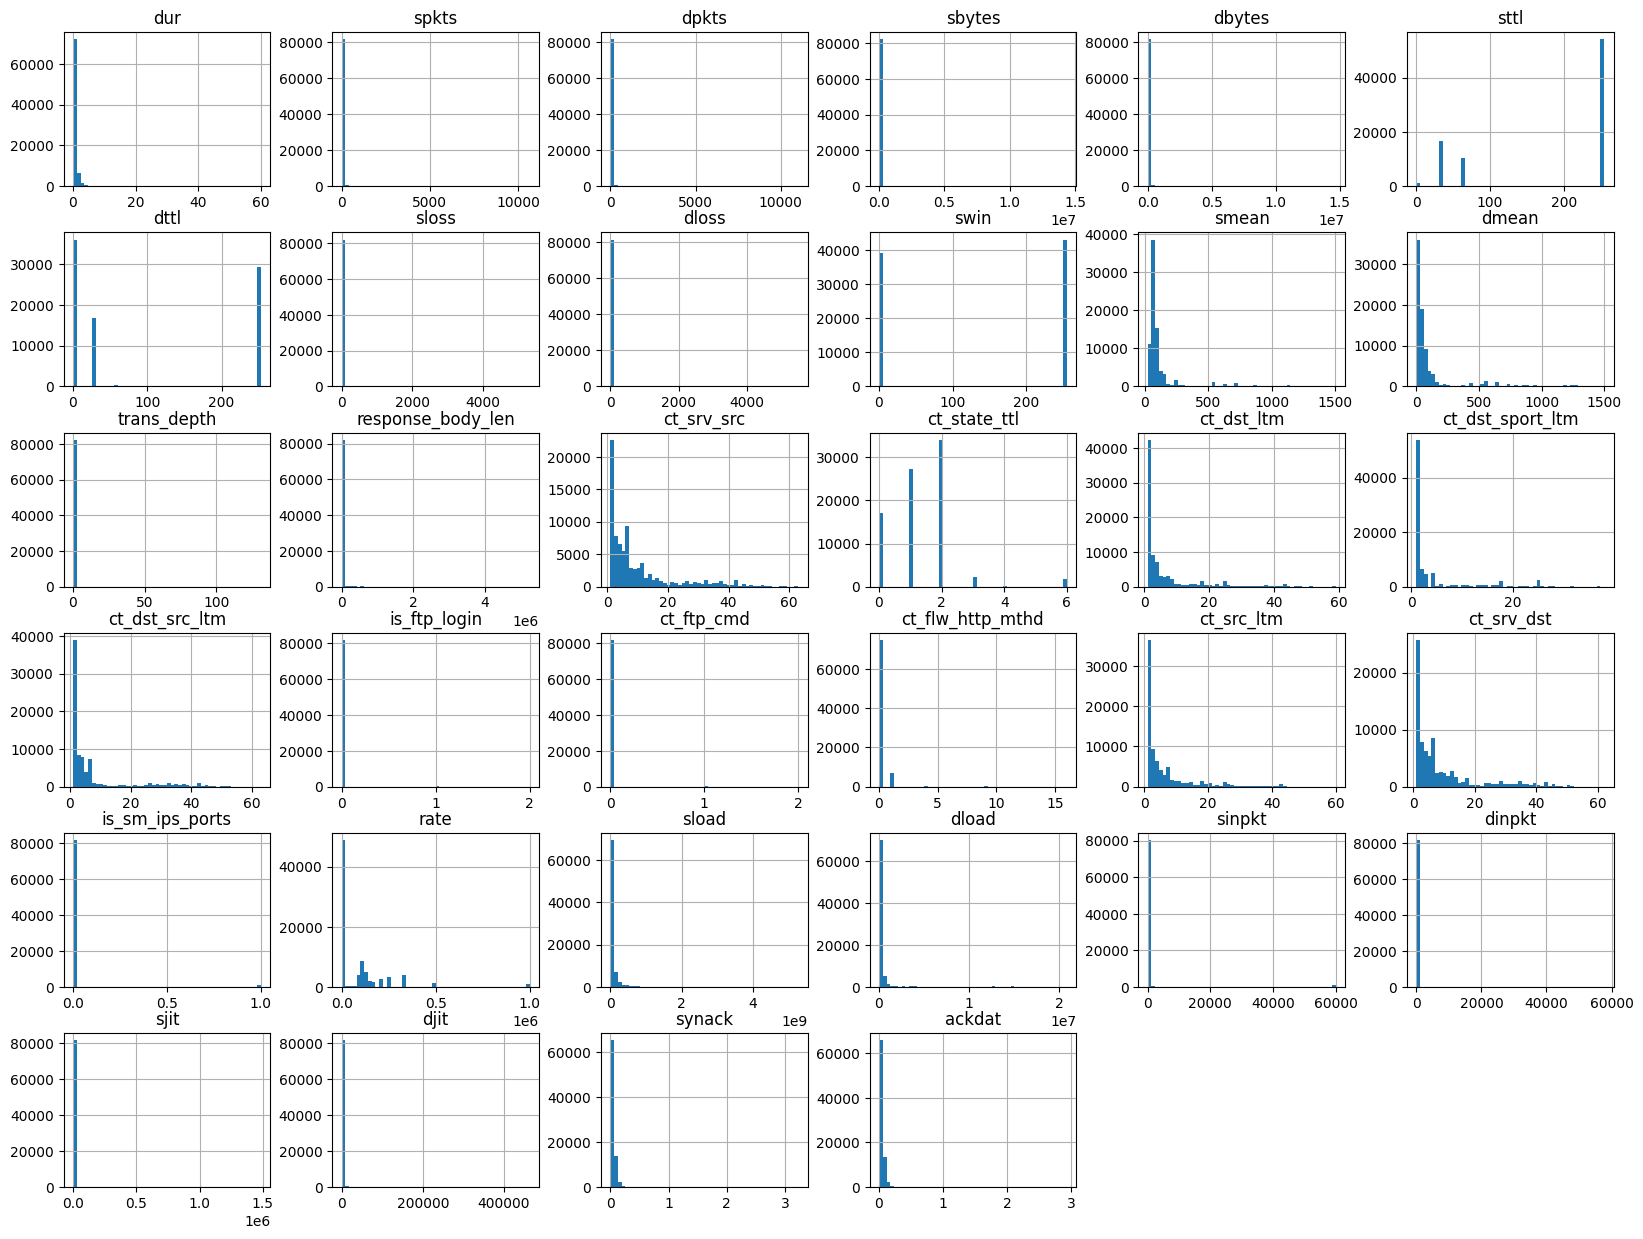

In [ ]:
train_data.loc[:, discrete_vars + continuous_vars].hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
d = {'INT':'INT', 'FIN':'FIN', 'CON':'CON', 'ECO':'OTHER', 'REQ':'REQ', 'RST':'RST', 'PAR':'OTHER', 'URN':'OTHER', 'no':'OTHER', 'ACC':'OTHER', 'CLO':'OTHER'}
train_data['state'] = train_data['state'].map(lambda s: d[s])

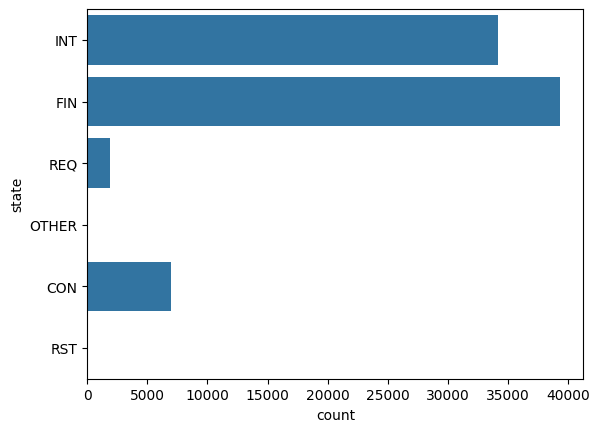

In [ ]:
sns.countplot(train_data['state'])
plt.show()

In [ ]:
most_occured = ['tcp', 'udp', 'unas']
def encoding_categoricals(column):
    if column in most_occured:
        return column
    else:
        return "other"

In [ ]:
train_data['proto'] = train_data['proto'].apply(encoding_categoricals)

test_data['proto'] = test_data['proto'].apply(encoding_categoricals)

In [ ]:
d = {'INT': 'INT', 'FIN': 'FIN', 'CON': 'CON', 'REQ': 'REQ', 'RST': 'RST', 'ACC': 'OTHER', 'CLO': 'OTHER', 'PAR': 'OTHER', 'URN': 'OTHER', 'no': 'OTHER'}

# Use the get method with a default value of 'OTHER' for keys not in the dictionary
test_data['state'] = test_data['state'].map(lambda s: d.get(s, 'OTHER'))


In [ ]:
"""d = {'INT':'INT', 'FIN':'FIN', 'CON':'CON', 'REQ':'REQ', 'RST':'RST', 'ACC':'OTHER', 'CLO':'OTHER','PAR':'OTHER', 'URN':'OTHER', 'no':'OTHER'}
test_data['state'] = test_data['state'].map(lambda s: d[s])"""

"d = {'INT':'INT', 'FIN':'FIN', 'CON':'CON', 'REQ':'REQ', 'RST':'RST', 'ACC':'OTHER', 'CLO':'OTHER','PAR':'OTHER', 'URN':'OTHER', 'no':'OTHER'}\ntest_data['state'] = test_data['state'].map(lambda s: d[s])"

In [ ]:
most_occured = ['INT', 'FIN', 'CON', 'REQ']

train_data = train_data[train_data['state'].isin(most_occured)]

test_data = test_data[test_data['state'].isin(most_occured)]

In [ ]:
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [ ]:
encode_text_dummy(train_data,"proto")
encode_text_dummy(train_data,"state")

encode_text_dummy(test_data,"proto")
encode_text_dummy(test_data,"state")

In [ ]:
train_data.drop(['swin','service','label', 'spkts', 'dinpkt', 'sjit', 'djit', 'response_body_len'],axis = 1, inplace = True)

In [ ]:
test_data.drop(['swin','service','label', 'spkts', 'dinpkt', 'sjit', 'djit', 'response_body_len'],axis = 1, inplace = True)

In [ ]:
test_data.shape[1]

42

In [ ]:
train_data.shape[1]

42

In [ ]:
print('Number of missing values:')
[(x, y) for x, y in zip(test_data.isna().sum(), test_data.isna().sum().index) if x > 0]

Number of missing values:


[]

In [ ]:
train_data=train_data.replace('-',np.nan)
for column in train_data.columns:
    print('\t%s: %d'%(column,train_data[column].isnull().sum()))

	dur: 0
	dpkts: 0
	sbytes: 0
	dbytes: 0
	rate: 0
	sttl: 0
	dttl: 0
	sload: 0
	dload: 0
	sloss: 0
	dloss: 0
	sinpkt: 0
	stcpb: 0
	dtcpb: 0
	dwin: 0
	tcprtt: 0
	synack: 0
	ackdat: 0
	smean: 0
	dmean: 0
	trans_depth: 0
	ct_srv_src: 0
	ct_state_ttl: 0
	ct_dst_ltm: 0
	ct_src_dport_ltm: 0
	ct_dst_sport_ltm: 0
	ct_dst_src_ltm: 0
	is_ftp_login: 0
	ct_ftp_cmd: 0
	ct_flw_http_mthd: 0
	ct_src_ltm: 0
	ct_srv_dst: 0
	is_sm_ips_ports: 0
	attack_cat: 0
	proto-other: 0
	proto-tcp: 0
	proto-udp: 0
	proto-unas: 0
	state-CON: 0
	state-FIN: 0
	state-INT: 0
	state-REQ: 0


In [ ]:
from sklearn import preprocessing
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd

In [ ]:
encode_text_index(train_data,"attack_cat")
encode_text_index(test_data,"attack_cat")

array(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Shellcode', 'Worms'], dtype=object)

In [ ]:
x_train = train_data.drop(['attack_cat'], axis = 1)
y_train = train_data.loc[:, ['attack_cat']]

x_test = test_data.drop(['attack_cat'], axis = 1)
y_test = test_data.loc[:, ['attack_cat']]


In [ ]:
x_train = x_train.astype('float')
x_test = x_test.astype('float')
for col in x_train.columns:
        encode_numeric_zscore(x_train,col)

for col in x_test.columns:
        encode_numeric_zscore(x_test,col)


In [ ]:
target = 'attack_cat'
features = list(train_data.columns)
features = [f for f in features if f!=target]

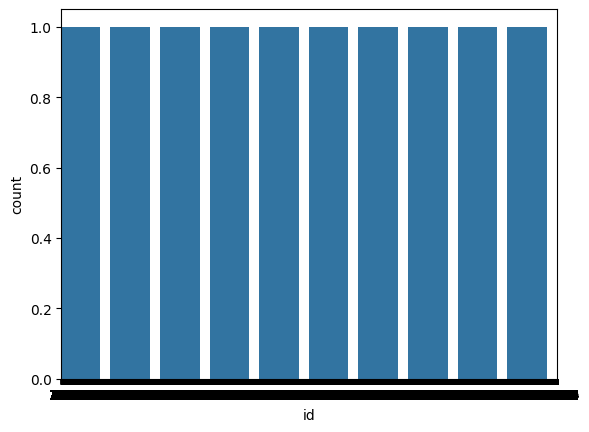

In [ ]:
sns.countplot(y_train[target])
plt.show()

In [ ]:
y_train= pd.get_dummies(y_train[target])
y_test = test_data.loc[:, ['attack_cat']]
print(x_train.shape, y_train.shape)

(82326, 41) (82326, 10)


In [ ]:
y_test = pd.get_dummies(y_test[target])

print(x_test.shape, y_test.shape)

(175243, 41) (175243, 10)


- #### Most correlated features are :

#### spkts, sbytes, sloss, dpkts, dbytes, dloss, sinpkt, is_sm_ips_ports, swin, dwin, tcprtt, synack, ct_srv_src, ct_srv_dst, ct_dst_src_ltm, ct_src_dport_ltm, ct_dst_sport_ltm, is_ftp_login ct_ftp_cmd

In [ ]:
import io
import requests
import os
import h5py
import shutil
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_path = '/Users/moksh/CSUS/CSC215/Project_1/model_weight5.hdf5'

model = Sequential()

#Tuning Hyperparameters to achieve best model and to improve performance
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(y_train.shape[1],activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

monitor = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')

model_checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss',verbose=1,save_best_only=False,save_weights_only=False, mode='auto') # save best model

model.fit(x_train, y_train, validation_data=(x_test,y_test), callbacks=[monitor, model_checkpoint], verbose=2, epochs=100)

model.load_weights(checkpoint_path) # load weights from best model
model.save(checkpoint_path)

Epoch 1/100

Epoch 1: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight5.hdf5
2573/2573 - 14s - loss: 0.6072 - accuracy: 0.7868 - val_loss: 0.8023 - val_accuracy: 0.7245 - 14s/epoch - 5ms/step
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight5.hdf5
2573/2573 - 15s - loss: 0.4724 - accuracy: 0.8306 - val_loss: 0.7509 - val_accuracy: 0.7390 - 15s/epoch - 6ms/step
Epoch 3/100

Epoch 3: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight5.hdf5
2573/2573 - 25s - loss: 0.4467 - accuracy: 0.8377 - val_loss: 0.7605 - val_accuracy: 0.7402 - 25s/epoch - 10ms/step
Epoch 4/100

Epoch 4: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight5.hdf5
2573/2573 - 15s - loss: 0.4319 - accuracy: 0.8415 - val_loss: 0.7819 - val_accuracy: 0.7494 - 15s/epoch - 6ms/step
Epoch 5/100

Epoch 5: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight5.hdf5
2573/2573 - 15s - loss: 0.4220 - accuracy: 0.8442 - val_loss: 0.7587 - val_accuracy: 0.7488 - 15s/epoch - 6ms/step
Epoch 6/100

Epoch 6: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight5.hdf5
2573/2573 - 15s - loss: 0.4136 - accuracy: 0.8463 - val_loss: 0.7708 - val_accuracy: 0.7536

In [ ]:
pred = model.predict(x_test)
print(pred[0])

5477/5477 [==============================] - 10s 2ms/step
[4.1031134e-07 4.5580221e-03 1.5382769e-02 2.3666291e-02 1.0309694e-03
 2.0388761e-03 7.2609604e-04 9.3876982e-01 1.3781241e-02 4.5484081e-05]


In [ ]:
pred = np.argmax(pred,axis=1) # raw probabilities to choose class (highest probability)
print(pred)

[7 3 3 ... 5 5 5]


In [ ]:
y_test = np.argmax(y_test.values, axis = 1)
print(y_test)

[6 6 6 ... 5 5 5]


In [ ]:
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(metrics.classification_report(y_test, pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2000
           1       0.00      0.00      0.00      1746
           2       0.34      0.46      0.39     12262
           3       0.67      0.70      0.68     33386
           4       0.50      0.40      0.45     18184
           5       0.98      0.98      0.98     39999
           6       0.83      0.92      0.87     55914
           7       0.80      0.52      0.63     10489
           8       0.52      0.18      0.27      1133
           9       0.00      0.00      0.00       130

    accuracy                           0.76    175243
   macro avg       0.46      0.42      0.43    175243
weighted avg       0.74      0.76      0.75    175243



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
def confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[    0     0   875   622     5     0   495     3     0     0]
 [    0     0   857   693   126    16    37    17     0     0]
 [    5     0  5675  5721   307    74   294   140    46     0]
 [   16     0  7141 23298  1435   225   881   336    54     0]
 [    0     0   828  1167  7345   199  8209   368    68     0]
 [    0     0   153   517   120 39010   155    39     5     0]
 [    3     0    11   614  3325   237 51581   129    14     0]
 [    0     0  1088  1992  1575     1   382  5451     0     0]
 [    0     0     5   181   332     5    65   341   204     0]
 [    0     0     0    79    17    21     5     7     1     0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Plotting confusion matrix


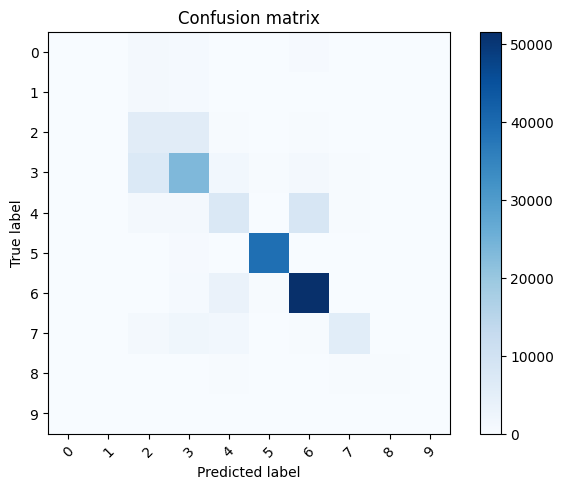

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, pred)
print(confusion_matrix)
classification = metrics.classification_report(y_test, pred)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(confusion_matrix, [0, 1, 2, 3, 4, 5, 6 ,7 ,8, 9])
plt.show()

## Top features


In [ ]:
import pandas as pd
import sys, os, time, warnings


import seaborn as sns
import pandas as pd



train_data = pd.read_csv("/content/drive/MyDrive/PAD_Network_DataSet/UNSW_NB15_testing-set.csv", index_col='id')
test_data = pd.read_csv("/content/drive/MyDrive/PAD_Network_DataSet/UNSW_NB15_testing-set.csv", index_col='id')

In [ ]:
train_data_copy=train_data
test_data_copy=test_data

In [ ]:
discrete_vars=['dur','spkts','dpkts','sbytes','dbytes','sttl','dttl','sloss','dloss','swin',
               'smean','dmean','trans_depth','response_body_len','ct_srv_src','ct_state_ttl',
               'ct_dst_ltm','ct_dst_sport_ltm','ct_dst_src_ltm','is_ftp_login','ct_ftp_cmd',
               'ct_flw_http_mthd','ct_src_ltm','ct_srv_dst','is_sm_ips_ports']
continuous_vars=['rate','sload','dload','sinpkt','dinpkt', 'sjit','djit','synack','ackdat']
categorical_vars=['proto','state','attack_cat''stcpb','dtcpb', 'tcprtt']
dep_var=['label']

In [ ]:
most_occured = ['tcp', 'udp', 'unas']
def encoding_categoricals(column):
    if column in most_occured:
        return column
    else:
        return "other"

In [ ]:
train_data['proto'] = train_data['proto'].apply(encoding_categoricals)

test_data['proto'] = test_data['proto'].apply(encoding_categoricals)

In [ ]:
d = {'INT': 'INT', 'FIN': 'FIN', 'CON': 'CON', 'REQ': 'REQ', 'RST': 'RST', 'ACC': 'OTHER', 'CLO': 'OTHER', 'PAR': 'OTHER', 'URN': 'OTHER', 'no': 'OTHER'}

# Use the get method with a default value of 'OTHER' for keys not in the dictionary
test_data['state'] = test_data['state'].map(lambda s: d.get(s, 'OTHER'))


In [ ]:
"""d = {'INT':'INT', 'FIN':'FIN', 'CON':'CON', 'REQ':'REQ', 'RST':'RST', 'ACC':'OTHER', 'CLO':'OTHER','PAR':'OTHER', 'URN':'OTHER', 'no':'OTHER'}
test_data['state'] = test_data['state'].map(lambda s: d[s])"""

"d = {'INT':'INT', 'FIN':'FIN', 'CON':'CON', 'REQ':'REQ', 'RST':'RST', 'ACC':'OTHER', 'CLO':'OTHER','PAR':'OTHER', 'URN':'OTHER', 'no':'OTHER'}\ntest_data['state'] = test_data['state'].map(lambda s: d[s])"

In [ ]:
most_occured = ['INT', 'FIN', 'CON', 'REQ']

train_data = train_data[train_data['state'].isin(most_occured)]

test_data = test_data[test_data['state'].isin(most_occured)]

In [ ]:
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [ ]:
encode_text_dummy(train_data,"proto")
encode_text_dummy(train_data,"state")

encode_text_dummy(test_data,"proto")
encode_text_dummy(test_data,"state")

<ipython-input-224-b3fe7a8244f8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[dummy_name] = dummies[x]
<ipython-input-224-b3fe7a8244f8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[dummy_name] = dummies[x]
<ipython-input-224-b3fe7a8244f8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [ ]:
corr_matrix = train_data.loc[:, ['label'] + continuous_vars].corr(method='pearson')
corr_matrix['label'].sort_values(ascending=False)
corr_matrix

,label,rate,sload,dload,sinpkt,dinpkt,sjit,djit,synack,ackdat
label,1.000000,0.337980,0.182804,-0.394145,-0.176246,-0.022936,-0.006478,-0.060998,0.058697,0.097729
rate,0.337980,1.000000,0.602417,-0.153145,-0.075769,-0.051551,-0.063241,-0.085844,-0.279167,-0.289993
sload,0.182804,0.602417,1.000000,-0.106348,-0.048768,-0.034845,-0.042355,-0.058044,-0.188666,-0.195973
dload,-0.394145,-0.153145,-0.106348,1.000000,-0.037661,-0.024329,-0.029395,-0.032986,-0.125133,-0.131290
sinpkt,-0.176246,-0.075769,-0.048768,-0.037661,1.000000,0.095750,0.048104,0.010495,-0.052384,-0.055013
dinpkt,-0.022936,-0.051551,-0.034845,-0.024329,0.095750,1.000000,0.674203,0.304709,0.089955,0.085649
sjit,-0.006478,-0.063241,-0.042355,-0.029395,0.048104,0.674203,1.000000,0.467709,0.132376,0.128446
djit,-0.060998,-0.085844,-0.058044,-0.032986,0.010495,0.304709,0.467709,1.000000,0.077399,0.080356
synack,0.058697,-0.279167,-0.188666,-0.125133,-0.052384,0.089955,0.132376,0.077399,1.000000,0.788922
ackdat,0.097729,-0.289993,-0.195973,-0.131290,-0.055013,0.085649,0.128446,0.080356,0.788922,1.000000


In [ ]:
corr_matrix = train_data.loc[:, ['label'] + discrete_vars].corr(method='pearson')
corr_matrix['label'].sort_values(ascending=False)

label                1.000000
sttl                 0.693542
ct_state_ttl         0.577402
ct_dst_sport_ltm     0.357060
ct_dst_src_ltm       0.304564
ct_src_ltm           0.238332
ct_dst_ltm           0.230034
ct_srv_src           0.229704
ct_srv_dst           0.228689
dttl                 0.094898
dur                  0.036454
sbytes               0.018507
ct_flw_http_mthd     0.015613
trans_depth          0.010691
sloss               -0.000736
smean               -0.011134
is_ftp_login        -0.011140
ct_ftp_cmd          -0.011140
response_body_len   -0.021399
spkts               -0.052339
dbytes              -0.076982
dloss               -0.094813
dpkts               -0.118769
is_sm_ips_ports     -0.184865
swin                -0.333439
dmean               -0.342227
Name: label, dtype: float64

In [ ]:
corr_matrix = corr_matrix[0:10]

In [ ]:
corr_matrix

,label,dur,spkts,dpkts,sbytes,dbytes,sttl,dttl,sloss,dloss,...,ct_state_ttl,ct_dst_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
label,1.000000,0.036454,-0.052339,-0.118769,0.018507,-0.076982,0.693542,0.094898,-0.000736,-0.094813,...,0.577402,0.230034,0.357060,0.304564,-0.011140,-0.011140,0.015613,0.238332,0.228689,-0.184865
dur,0.036454,1.000000,0.254543,0.181298,0.199650,0.144261,0.012038,0.044126,0.198506,0.143088,...,0.186840,-0.086466,-0.093879,-0.101790,0.020683,0.020683,0.024811,-0.081007,-0.115370,0.035425
spkts,-0.052339,0.254543,1.000000,0.390083,0.963775,0.206653,-0.102789,0.068139,0.971057,0.207847,...,-0.086218,-0.060174,-0.072511,-0.077513,0.009954,0.009954,0.006099,-0.061563,-0.069547,-0.017772
dpkts,-0.118769,0.181298,0.390083,1.000000,0.188450,0.971913,-0.192585,0.053826,0.204862,0.978643,...,-0.150204,-0.071907,-0.094318,-0.094051,0.013482,0.013482,0.047988,-0.075193,-0.078306,-0.021775
sbytes,0.018507,0.199650,0.963775,0.188450,1.000000,0.009930,-0.020909,0.062906,0.996108,0.006812,...,-0.011999,-0.026630,-0.027277,-0.032015,-0.004511,-0.004511,-0.002172,-0.027444,-0.034500,-0.006363
dbytes,-0.076982,0.144261,0.206653,0.971913,0.009930,1.000000,-0.135512,0.023547,0.017373,0.996504,...,-0.090069,-0.042635,-0.056937,-0.054612,-0.010467,-0.010467,0.051415,-0.045599,-0.044509,-0.013154
sttl,0.693542,0.012038,-0.102789,-0.192585,-0.020909,-0.135512,1.000000,-0.032822,-0.044728,-0.162629,...,0.673158,0.271352,0.380171,0.404176,-0.124148,-0.124148,-0.112889,0.273242,0.340495,-0.220434
dttl,0.094898,0.044126,0.068139,0.053826,0.062906,0.023547,-0.032822,1.000000,0.075060,0.035464,...,-0.262671,-0.381724,-0.389548,-0.403554,0.107200,0.107200,0.223697,-0.365457,-0.431290,-0.091157
sloss,-0.000736,0.198506,0.971057,0.204862,0.996108,0.017373,-0.044728,0.075060,1.000000,0.017981,...,-0.036624,-0.036936,-0.041112,-0.045813,0.005695,0.005695,-0.002036,-0.038763,-0.045407,-0.009489
dloss,-0.094813,0.143088,0.207847,0.978643,0.006812,0.996504,-0.162629,0.035464,0.017981,1.000000,...,-0.114855,-0.054541,-0.072243,-0.070887,0.007755,0.007755,0.048880,-0.057420,-0.058587,-0.016677


In [ ]:
correlation_list= train_data_copy[train_data_copy.columns[:]].corr()['label']

correlation_list1 = correlation_list.sort_values(ascending = False)
correlation_list1 = correlation_list1[0:10]
correlation_list1 = [col for col in correlation_list1.index]

<ipython-input-230-4ffa8aac8ef9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_list= train_data_copy[train_data_copy.columns[:]].corr()['label']


In [ ]:
correlation_list1

['label',
 'sttl',
 'ct_state_ttl',
 'ct_dst_sport_ltm',
 'rate',
 'ct_src_dport_ltm',
 'ct_dst_src_ltm',
 'ct_src_ltm',
 'ct_dst_ltm',
 'ct_srv_src']

In [ ]:
correlation_list2 = correlation_list[10:]


In [ ]:
correlation_list2 = [col for col in correlation_list2.index]


In [ ]:
train_data_copy = train_data_copy.drop(correlation_list2, axis = 1)
test_data_copy= test_data_copy.drop(correlation_list2, axis = 1)


In [ ]:
train_data.drop(['service','attack_cat'], axis=1, inplace=True)
test_data.drop(['service','attack_cat'], axis=1, inplace=True)

In [ ]:
x_train = train_data.drop(['label'], axis = 1)
y_train= train_data.loc[:, ['label']]

x_test= test_data.drop(['label'], axis = 1)
y_test= test_data.loc[:, ['label']]


In [ ]:
x_train = x_train.astype('float')
x_test = x_test.astype('float')

In [ ]:
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd

In [ ]:
for col in x_train.columns:
        encode_numeric_zscore(x_train,col)

for col in x_test.columns:
        encode_numeric_zscore(x_test,col)
target = 'label'
y_train = pd.get_dummies(y_train[target])
y_test = test_data.loc[:, ['label']]
y_test = pd.get_dummies(y_test[target])

In [ ]:
import io
import requests
import os
import h5py
import shutil
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_path = '/Users/moksh/CSUS/CSC215/Project_1/model_weight5.hdf5'

model = Sequential()

#Tuning Hyperparameters to achieve best model and to improve performance
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(y_train.shape[1],activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

monitor = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')

model_checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss',verbose=1,save_best_only=False,save_weights_only=False, mode='auto') # save best model

model.fit(x_train, y_train, validation_data=(x_test,y_test), callbacks=[monitor, model_checkpoint], verbose=2, epochs=10)

model.load_weights(checkpoint_path) # load weights from best model
model.save(checkpoint_path)

Epoch 1/10

Epoch 1: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight5.hdf5
5477/5477 - 22s - loss: 0.1378 - accuracy: 0.9366 - val_loss: 0.1300 - val_accuracy: 0.9376 - 22s/epoch - 4ms/step
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight5.hdf5
5477/5477 - 21s - loss: 0.1248 - accuracy: 0.9399 - val_loss: 0.1226 - val_accuracy: 0.9407 - 21s/epoch - 4ms/step
Epoch 3/10

Epoch 3: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight5.hdf5
5477/5477 - 21s - loss: 0.1215 - accuracy: 0.9415 - val_loss: 0.1184 - val_accuracy: 0.9429 - 21s/epoch - 4ms/step
Epoch 4/10

Epoch 4: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight5.hdf5
5477/5477 - 18s - loss: 0.1190 - accuracy: 0.9433 - val_loss: 0.1159 - val_accuracy: 0.9442 - 18s/epoch - 3ms/step
Epoch 5/10

Epoch 5: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight5.hdf5
5477/5477 - 21s - loss: 0.1164 - accuracy: 0.9442 - val_loss: 0.1165 - val_accuracy: 0.9450 - 21s/epoch - 4ms/step
Epoch 6/10

Epoch 6: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight5.hdf5
5477/5477 - 21s - loss: 0.1151 - accuracy: 0.9451 - val_loss: 0.1114 - val_accuracy: 0.9467 - 21

In [ ]:
import numpy as np
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1) # raw probabilities to choose class (highest probability)
print(y_pred)
y_test = np.argmax(y_test.values, axis = 1)
print(y_test)

5477/5477 [==============================] - 10s 2ms/step
[0 1 1 ... 1 1 1]
[0 0 0 ... 1 1 1]


In [ ]:
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92     55914
           1       0.96      0.96      0.96    119329

    accuracy                           0.95    175243
   macro avg       0.94      0.94      0.94    175243
weighted avg       0.95      0.95      0.95    175243



In [ ]:
from sklearn.metrics import roc_curve,auc
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

[[ 51399   4515]
 [  4942 114387]]
Plotting confusion matrix


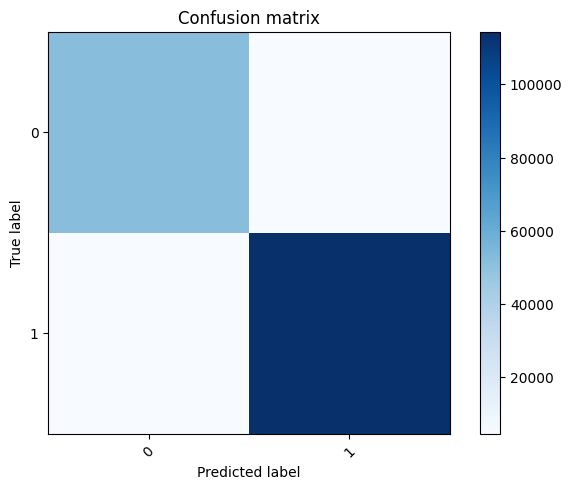

In [ ]:
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)
classification = metrics.classification_report(y_test, y_pred)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(confusion_matrix, [0, 1])
plt.show()

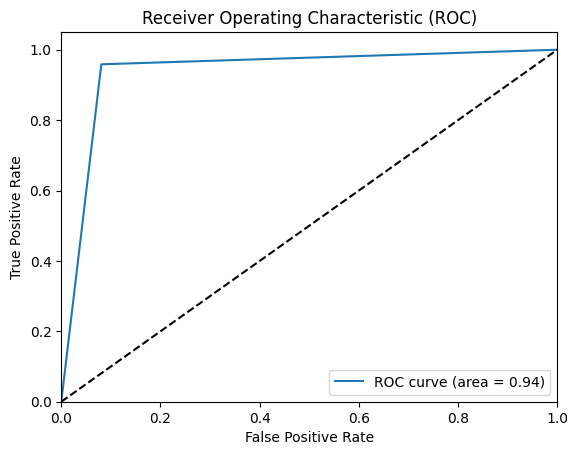

In [ ]:
plot_roc(y_pred, y_test)